In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv("../input/heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
print("number of rows in the dataset: " + str(data.shape[0]))
print("number of columns in the dataset: " + str(data.shape[1]))

number of rows in the dataset: 303
number of columns in the dataset: 14


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


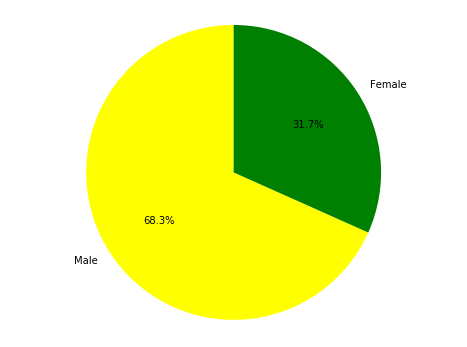

In [9]:
#making piechart of the age feature : male/female

male = len( data[data["sex"] == 1] )
female = len( data[data["sex"] == 0] )

plt.figure(figsize=(8,6))

labels = "Male", "Female"
sizes = [male, female]
colors = ["yellow", "green"]

plt.pie(x=sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis("equal")
plt.show()

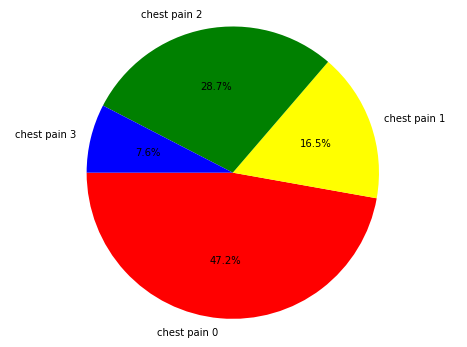

In [10]:
#making piechart of cp feature: chest pain type

size = [ len(data[data["cp"]==0]), len(data[data["cp"]==1]), len(data[data["cp"]==2]), len(data[data["cp"]==3]) ]
colors = ["red", "yellow", "green", "blue"]
labels = [ "chest pain 0", "chest pain 1", "chest pain 2", "chest pain 3" ]

plt.figure(figsize=(8,6))

plt.pie(x=size, colors=colors, labels=labels, autopct="%1.1f%%", startangle=180)
plt.axis("equal")
plt.show()

In [11]:
sns.set_style("whitegrid")

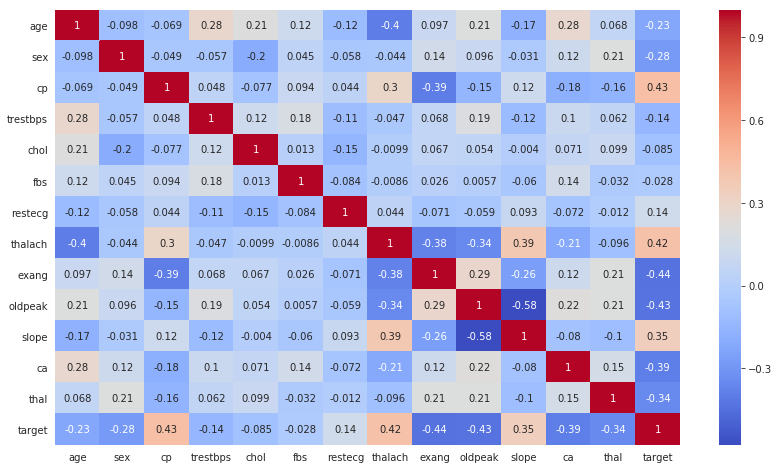

In [12]:
#plotting the correlation between features

plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

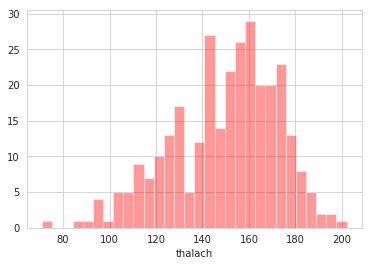

In [13]:
#plotting the distribution of thalach: MAXIMUM HEART RATE ACHIEVED feature

sns.distplot(data["thalach"], kde=False, bins=30, color = "red")
plt.show()

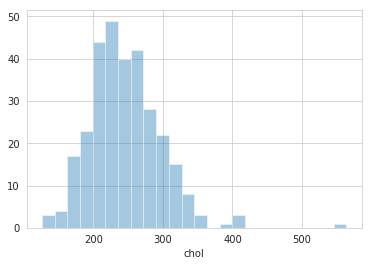

In [14]:
#plotting the distribution of chol: SERUM CHOLESTROL IN MG/DL feature

sns.distplot(data["chol"], kde=False)
plt.show()

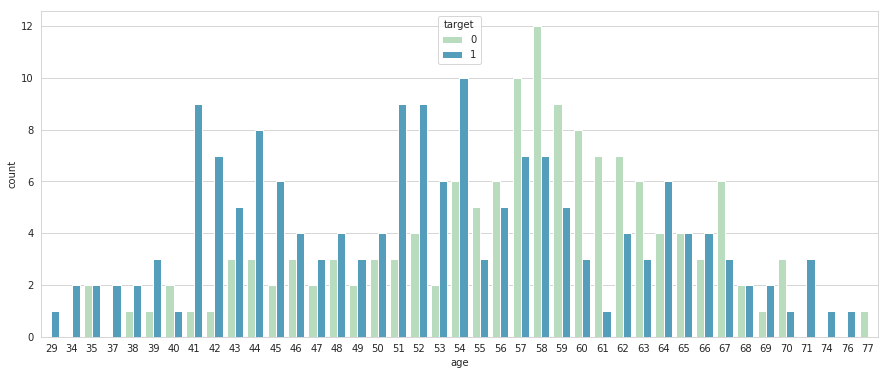

In [15]:
#plotting the number of people with heart disease based on age

plt.figure(figsize=(15,6))
sns.countplot(x="age", hue="target", data=data, palette="GnBu")
plt.show()

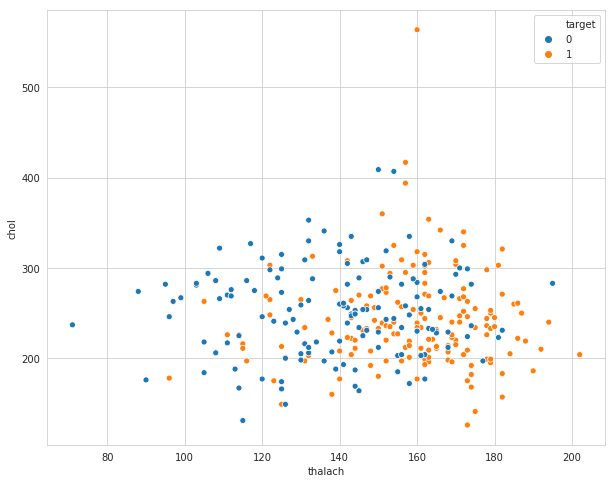

In [16]:
#scatterplot of thalach vs chol

plt.figure(figsize=(10,8))
sns.scatterplot(x="thalach", y="chol", hue="target", data=data)
plt.show()

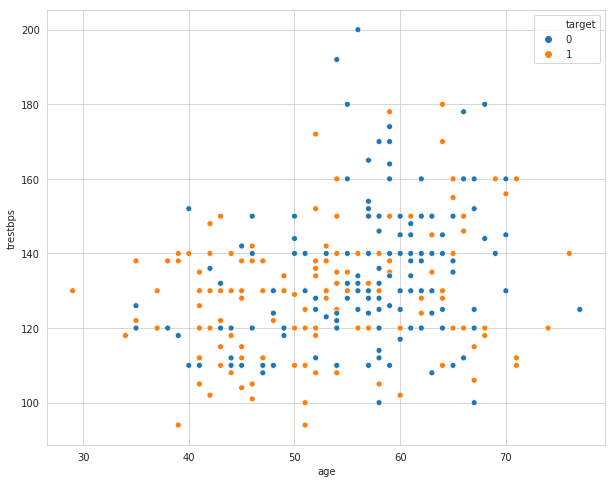

In [17]:
#scatterplot between trestbps vs age

plt.figure(figsize=(10,8))
sns.scatterplot(x="age", y="trestbps", hue="target", data=data)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#splitting the dataset

x = data.drop("target", axis=1)
y = data["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
#preprocessing the data: scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train = pd.DataFrame( x_train_scaled )
x_test = pd.DataFrame( x_test_scaled )

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
x_train.shape

(212, 13)

In [22]:
x_test.shape

(91, 13)

In [23]:
#gridsearchcv to find best parameters
#kNN algorithm classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = { "n_neighbors" : [ i for i in range(1,33,2) ] }

In [24]:
model = GridSearchCV(knn, params, cv=10)

In [25]:
model.fit(x_train, y_train)

#printing the best value for k in kNN
print(model.best_params_)

{'n_neighbors': 17}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
pred = model.predict(x_test)

In [27]:
#printing accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy score is : ", accuracy_score(y_test,pred))

print("accuracy score using kNN is ", round(accuracy_score(y_test,pred), 5)*100, "%")

accuracy score is :  0.8241758241758241
accuracy score using kNN is  82.418 %


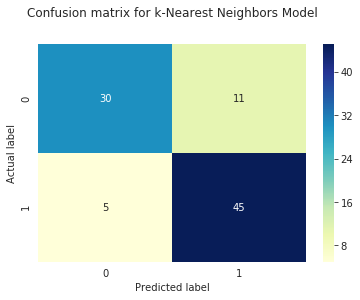

In [28]:
# creating confusion matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

confusion = confusion_matrix(y_test, pred)

#create a heat map
sns.heatmap(pd.DataFrame(confusion), annot = True, cmap = 'YlGnBu', fmt = 'g')

plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [29]:
# printing the classification report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.80      0.90      0.85        50

   micro avg       0.82      0.82      0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



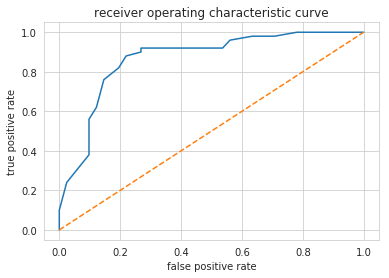

In [30]:
#receiver operating characteristics ROC curve

from sklearn.metrics import roc_auc_score, roc_curve

#get prediction probabilities
y_prob = model.predict_proba(x_test)[:,1]

false_pos_rate_knn, true_pos_rate_knn, threshold_knn = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(false_pos_rate_knn, true_pos_rate_knn)
plt.plot([0,1],ls='--')

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("receiver operating characteristic curve")

plt.show()

In [31]:
# area under the roc curve

print(roc_auc_score(y_test, pred))

0.8158536585365853


In [32]:
# classification using logistic regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# finding best parameters from gridsearchcv

params = { "penalty":["l1","l2"], "C":[0.01,0.1,1,10,100], "class_weight":["balanced",None] }
log_model = GridSearchCV(log, param_grid=params, cv=10)
log_model.fit(x_train,y_train)
print(log_model.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
pred_log = log_model.predict(x_test)

In [34]:
print("the accuracy score using logistic regression is : ", round(accuracy_score(y_test, pred_log),5)*100, "%")

the accuracy score using logistic regression is :  84.615 %


In [35]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

   micro avg       0.85      0.85      0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



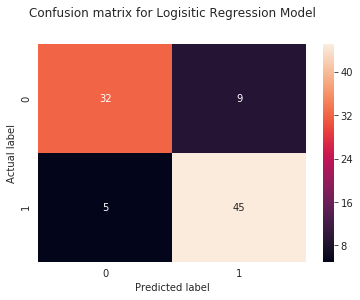

In [36]:
# creating the confusion matrix

class_names = [0,1]
fig,ax = plt.subplots()
tickmarks = np.arange(len(class_names))
plt.xticks(tickmarks, class_names)
plt.yticks(tickmarks, class_names)

confusion = confusion_matrix(y_test, pred_log)

sns.heatmap(pd.DataFrame(confusion), annot = True)

plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

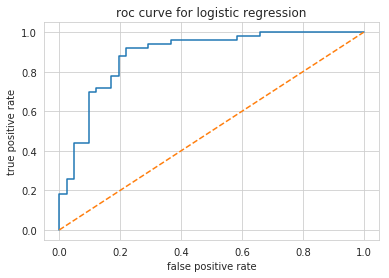

In [37]:
target_prob_log = log_model.predict_proba(x_test)[:,1]

false_pos_rate_log, true_pos_rate_log, threshold_log = roc_curve(y_test, target_prob_log)

plt.figure(figsize=(6,4))
plt.plot(false_pos_rate_log, true_pos_rate_log)
plt.plot([0,1], ls="--")

plt.title("roc curve for logistic regression")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.show()

In [38]:
# area under the roc curve

print(roc_auc_score(y_test, pred_log))

0.8402439024390244


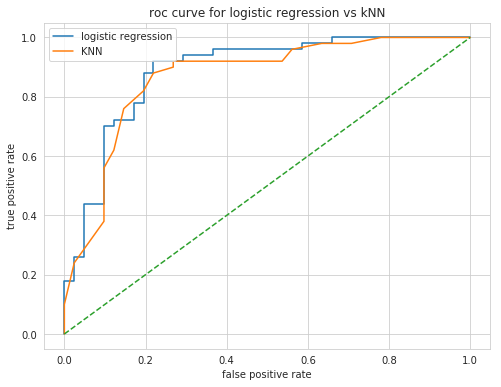

In [39]:
# comparing the roc curve from knn and logistic regression method

plt.figure(figsize=(8,6))
plt.plot(false_pos_rate_log, true_pos_rate_log, label="logistic regression")
plt.plot(false_pos_rate_knn, true_pos_rate_knn, label="KNN")
plt.plot([0,1], ls="--")

plt.title("roc curve for logistic regression vs kNN")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()